### This project contains data related to a Manufacturing company The dataset consists of different machines, production unit, with different shift times from different defect rates. As a Data Analyst, your task in hand is to find a suitable approach and solve the problems given.

# Problems for EDA dataset

# Q 1

### Dealing with IQR using outlier

#### Calculate the Interquartile Range (IQR) for all the numerical columns and use the IQR to identify any potential outliers in these data points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("D:\Sourav_Singh\Excell ,SQL & Tableau\Project_to_make\y1AQEIpMTR2j7xgr9MH0_Manufacturing Dataset.csv")

In [2]:
# Display the first few rows and data info
print(df.head())

  Production ID        Date Product Type  Machine ID  Shift  Units Produced  \
0    31-12-1899  01-01-2020   Automotive           3  Swing             142   
1    01-01-1900  02-01-2020     Textiles           8  Night             170   
2    02-01-1900  03-01-2020   Appliances          11  Swing             182   
3    03-01-1900  04-01-2020   Appliances          11    Day             133   
4    04-01-1900  05-01-2020  Electronics          14  Night              82   

   Defects  Production Time Hours  Material Cost Per Unit  \
0      3.0                  23.42                   38.68   
1      4.0                   7.51                   21.35   
2      4.0                  20.58                   47.54   
3      NaN                  21.68                   40.21   
4      NaN                  16.68                   38.02   

   Labour Cost Per Hour  Energy Consumption kWh  Operator Count  \
0                 15.38                  413.97               1   
1                 25.36 

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Production ID                   3000 non-null   object 
 1   Date                            3000 non-null   object 
 2   Product Type                    3000 non-null   object 
 3   Machine ID                      3000 non-null   int64  
 4   Shift                           3000 non-null   object 
 5   Units Produced                  3000 non-null   int64  
 6   Defects                         2701 non-null   float64
 7   Production Time Hours           3000 non-null   float64
 8   Material Cost Per Unit          3000 non-null   float64
 9   Labour Cost Per Hour            3000 non-null   float64
 10  Energy Consumption kWh          3000 non-null   float64
 11  Operator Count                  3000 non-null   int64  
 12  Maintenance Hours               27

In [4]:
print(df.describe())

        Machine ID  Units Produced      Defects  Production Time Hours  \
count  3000.000000     3000.000000  2701.000000            3000.000000   
mean     10.259000      125.037667     4.612736              12.577697   
std       5.752821       43.566718     3.201673               6.910378   
min       1.000000       50.000000     0.000000               1.000000   
25%       5.000000       86.000000     2.000000               6.797500   
50%      10.000000      126.000000     4.000000              12.400000   
75%      15.000000      163.000000     7.000000              18.332500   
max      20.000000      199.000000    34.000000              50.000000   

       Material Cost Per Unit  Labour Cost Per Hour  Energy Consumption kWh  \
count             3000.000000           3000.000000             3000.000000   
mean                30.206220             22.642937              299.895430   
std                 11.726906              4.396858              114.987552   
min              

In [5]:
# List of numerical columns to calculate IQR for
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Function to calculate IQR and identify outliers
def detect_outliers_iqr(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return Q1, Q3, IQR, outliers



Column: Machine ID
Q1: 5.0, Q3: 15.0, IQR: 10.0
Number of outliers in Machine ID: 0


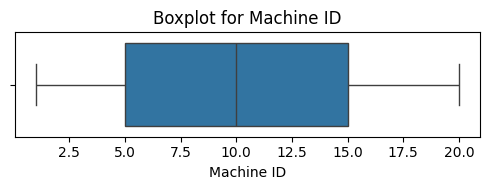



Column: Units Produced
Q1: 86.0, Q3: 163.0, IQR: 77.0
Number of outliers in Units Produced: 0


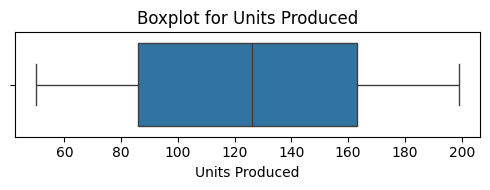



Column: Defects
Q1: 2.0, Q3: 7.0, IQR: 5.0
Number of outliers in Defects: 10


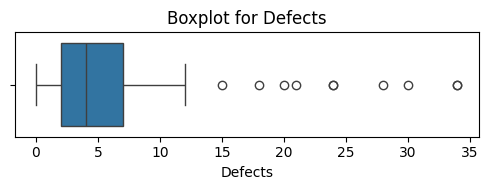



Column: Production Time Hours
Q1: 6.797499999999999, Q3: 18.3325, IQR: 11.535
Number of outliers in Production Time Hours: 8


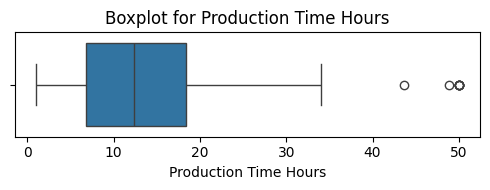



Column: Material Cost Per Unit
Q1: 20.32, Q3: 40.1225, IQR: 19.802500000000002
Number of outliers in Material Cost Per Unit: 0


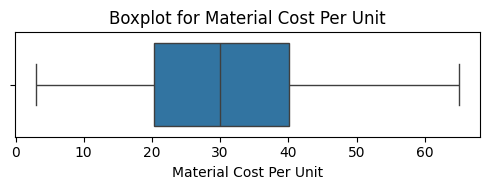



Column: Labour Cost Per Hour
Q1: 18.81, Q3: 26.4925, IQR: 7.682500000000001
Number of outliers in Labour Cost Per Hour: 0


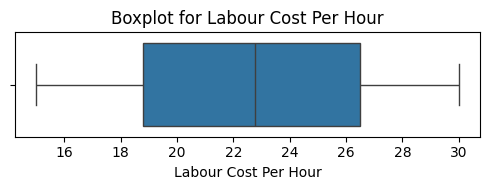



Column: Energy Consumption kWh
Q1: 199.05, Q3: 401.145, IQR: 202.09499999999997
Number of outliers in Energy Consumption kWh: 0


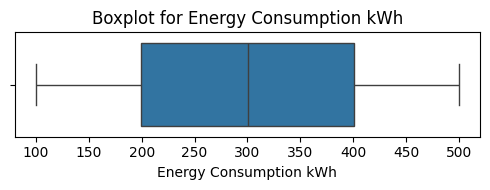



Column: Operator Count
Q1: 2.0, Q3: 4.0, IQR: 2.0
Number of outliers in Operator Count: 0


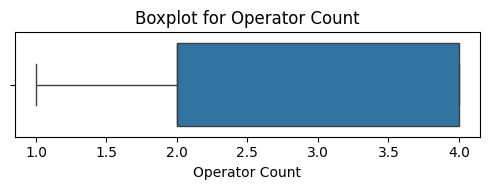



Column: Maintenance Hours
Q1: 1.24, Q3: 3.76, IQR: 2.5199999999999996
Number of outliers in Maintenance Hours: 0


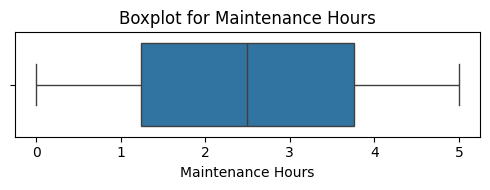



Column: Down time Hours
Q1: 0.78, Q3: 2.3, IQR: 1.5199999999999998
Number of outliers in Down time Hours: 0


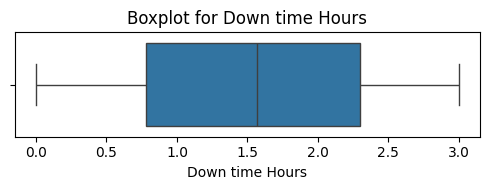



Column: Production Volume Cubic Meters
Q1: 1.0175, Q3: 2.01, IQR: 0.9924999999999997
Number of outliers in Production Volume Cubic Meters: 0


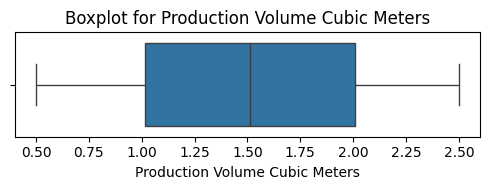



Column: Scrap Rate
Q1: 0.02, Q3: 0.04, IQR: 0.02
Number of outliers in Scrap Rate: 0


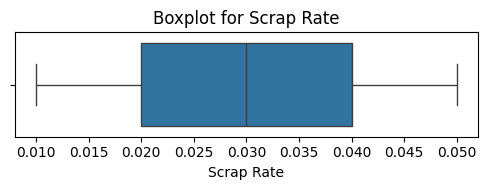



Column: Rework Hours
Q1: 0.5, Q3: 1.49, IQR: 0.99
Number of outliers in Rework Hours: 0


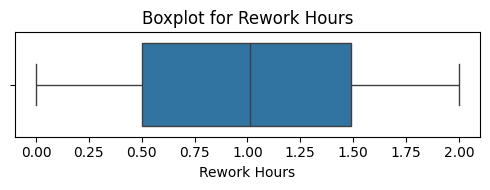



Column: Quality Checks Failed
Q1: 0.0, Q3: 2.0, IQR: 2.0
Number of outliers in Quality Checks Failed: 0


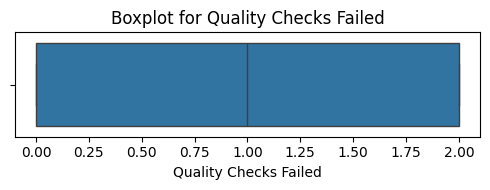



Column: Average Temperature C
Q1: 19.8, Q3: 23.4, IQR: 3.599999999999998
Number of outliers in Average Temperature C: 0


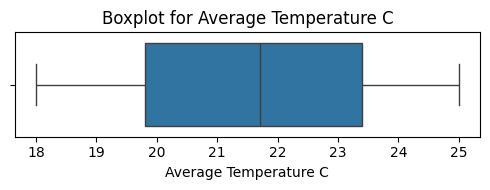



Column: Average Humidity Percent
Q1: 37.5, Q3: 52.2, IQR: 14.700000000000003
Number of outliers in Average Humidity Percent: 0


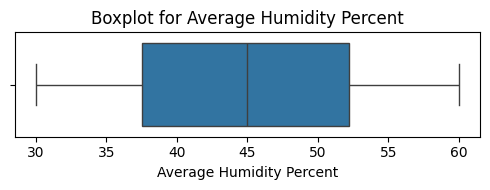

In [6]:
# Loop through each numerical column, calculate IQR, detect outliers, and create boxplots
for column in numerical_columns:
    Q1, Q3, IQR, outliers = detect_outliers_iqr(df, column)

    print( "\n" )
    print(f"Column: {column}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Number of outliers in {column}: {len(outliers)}")
#   print(outliers, "\n")
    
    # Create a boxplot to visualize the outliers
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

# Q 2

## 2. Identify Missing Values Across Key Production Metrics:

#### Analyse the dataset to identify missing values across all the columns and calculate the total number of missing values for each of these columns. Describe your findings and then impute all the missing values with suitable data points.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("D:\Sourav_Singh\Excell ,SQL & Tableau\Project_to_make\y1AQEIpMTR2j7xgr9MH0_Manufacturing Dataset.csv")

In [8]:
# Analyze missing values across all columns
missing_values = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Display the total number of missing values for each column
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})

print("Missing Values Summary:")
print(missing_summary)

Missing Values Summary:
                                Missing Values  Missing Percentage
Production ID                                0            0.000000
Date                                         0            0.000000
Product Type                                 0            0.000000
Machine ID                                   0            0.000000
Shift                                        0            0.000000
Units Produced                               0            0.000000
Defects                                    299            9.966667
Production Time Hours                        0            0.000000
Material Cost Per Unit                       0            0.000000
Labour Cost Per Hour                         0            0.000000
Energy Consumption kWh                       0            0.000000
Operator Count                               0            0.000000
Maintenance Hours                          300           10.000000
Down time Hours                       

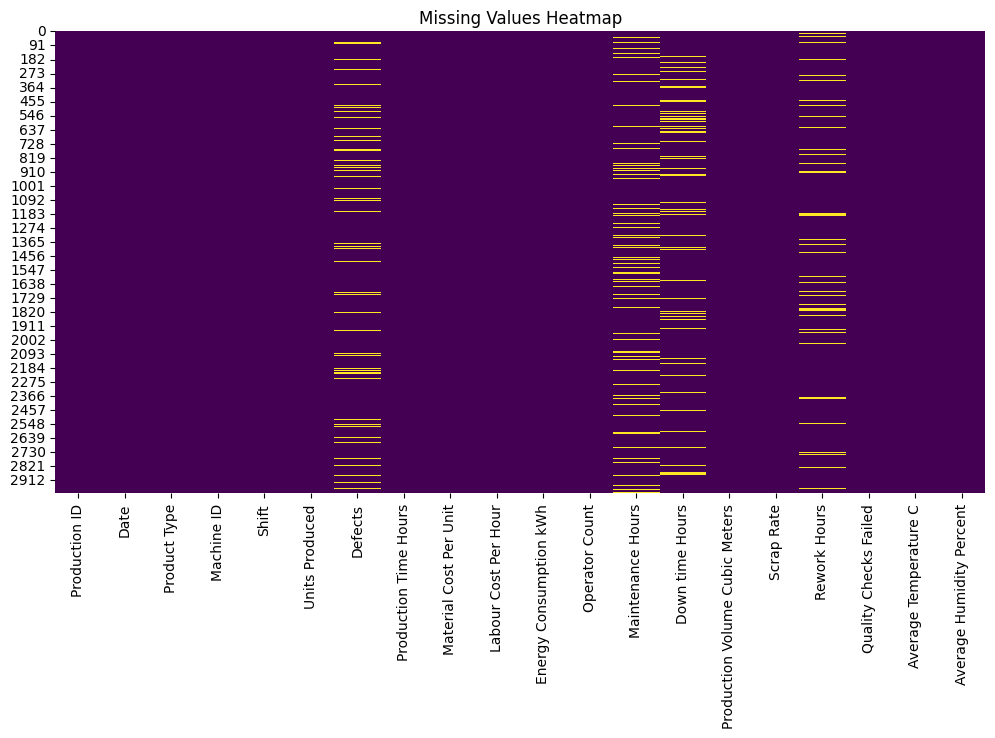

In [9]:
# Plotting missing values as a heatmap for visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
def impute_values(df):
    # Fill numerical columns with their median
    for column in df.select_dtypes(include=[np.number]):
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
    
    # Fill categorical columns with mode
    for column in df.select_dtypes(include=[object]):
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

impute_values(df)

In [11]:
# Step 3: Verify that there are no missing values
print("\nAfter Imputation:")
print(df.isnull().sum())



After Imputation:
Production ID                     0
Date                              0
Product Type                      0
Machine ID                        0
Shift                             0
Units Produced                    0
Defects                           0
Production Time Hours             0
Material Cost Per Unit            0
Labour Cost Per Hour              0
Energy Consumption kWh            0
Operator Count                    0
Maintenance Hours                 0
Down time Hours                   0
Production Volume Cubic Meters    0
Scrap Rate                        0
Rework Hours                      0
Quality Checks Failed             0
Average Temperature C             0
Average Humidity Percent          0
dtype: int64


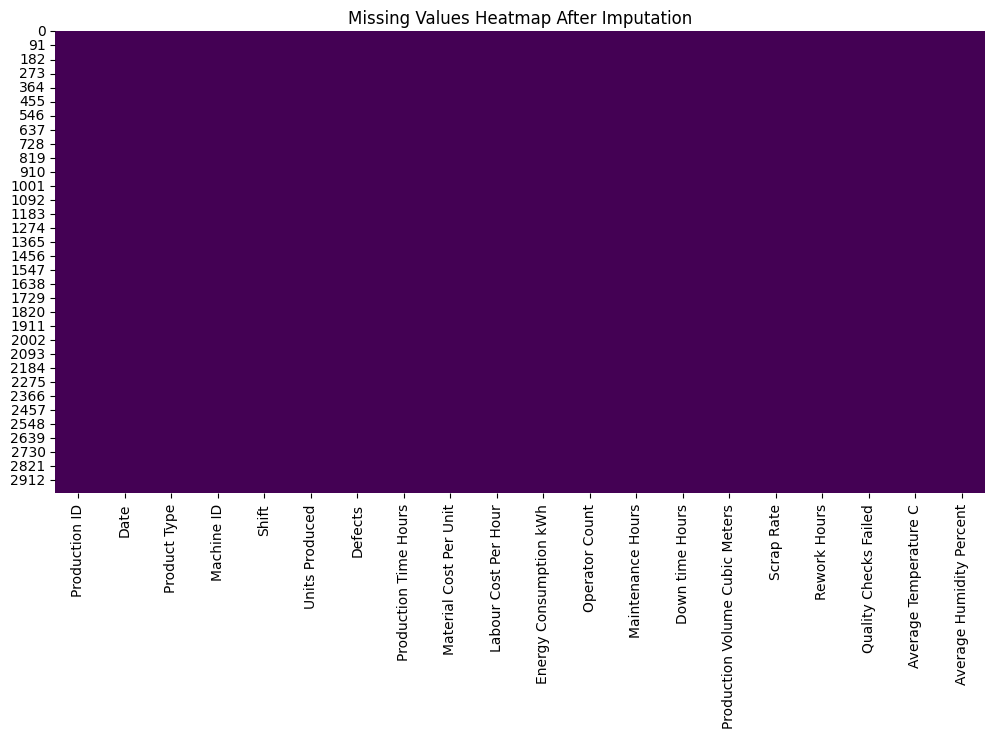

In [12]:
# Step 4: Visualize after imputation (optional)
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Imputation')
plt.show()


# Q 3

## 3. Relationship Between Costs:

#### Is there a pattern between the cost of materials per unit and the hourly labor cost? Determine if higher costs in materials tend to coincide with higher labor costs.

### Approaches Simplified:

#### Relationship Between Costs: Calculate the correlation coefficient between material cost per unit and labour cost per hour to identify any linear relationship.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("D:\Sourav_Singh\Excell ,SQL & Tableau\Project_to_make\y1AQEIpMTR2j7xgr9MH0_Manufacturing Dataset.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Production ID                   3000 non-null   object 
 1   Date                            3000 non-null   object 
 2   Product Type                    3000 non-null   object 
 3   Machine ID                      3000 non-null   int64  
 4   Shift                           3000 non-null   object 
 5   Units Produced                  3000 non-null   int64  
 6   Defects                         2701 non-null   float64
 7   Production Time Hours           3000 non-null   float64
 8   Material Cost Per Unit          3000 non-null   float64
 9   Labour Cost Per Hour            3000 non-null   float64
 10  Energy Consumption kWh          3000 non-null   float64
 11  Operator Count                  3000 non-null   int64  
 12  Maintenance Hours               27

In [15]:
# Calculate the correlation coefficient
correlation = df['Material Cost Per Unit'].corr(df['Labour Cost Per Hour'])

print('Correlation coefficient between Material Cost Per Unit and Labour Cost Per Hour: ' + str(correlation))

Correlation coefficient between Material Cost Per Unit and Labour Cost Per Hour: -3.548388807144353e-06


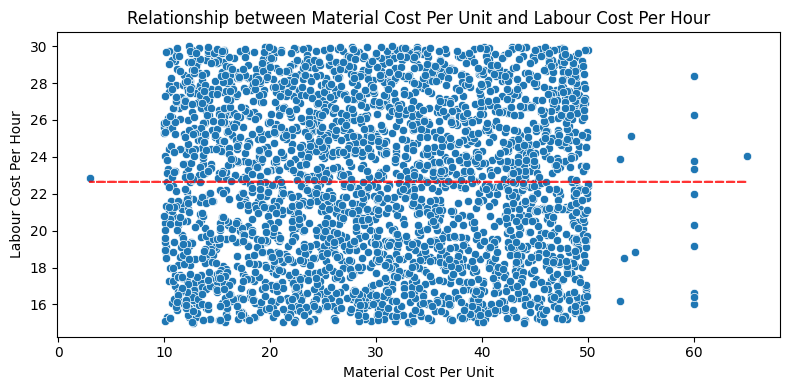

In [16]:
# Create a scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Material Cost Per Unit', y='Labour Cost Per Hour', data=df)
plt.title('Relationship between Material Cost Per Unit and Labour Cost Per Hour')
plt.xlabel('Material Cost Per Unit')
plt.ylabel('Labour Cost Per Hour')

# Add a trend line
z = np.polyfit(df['Material Cost Per Unit'], df['Labour Cost Per Hour'], 1)
p = np.poly1d(z)
plt.plot(df['Material Cost Per Unit'], p(df['Material Cost Per Unit']), 'r--', alpha=0.8)
plt.tight_layout()
plt.show()

In [17]:
# Additional analysis: Summary statistics
cost_summary = df[['Material Cost Per Unit', 'Labour Cost Per Hour']].describe()
print(cost_summary)

       Material Cost Per Unit  Labour Cost Per Hour
count             3000.000000           3000.000000
mean                30.206220             22.642937
std                 11.726906              4.396858
min                  3.000000             15.000000
25%                 20.320000             18.810000
50%                 30.045000             22.770000
75%                 40.122500             26.492500
max                 65.000000             30.000000


In [18]:
# Calculate the ratio of Material Cost to Labor Cost
df['Material_to_Labour_Ratio'] = df['Material Cost Per Unit'] / df['Labour Cost Per Hour']

In [19]:
print(df['Material_to_Labour_Ratio'].describe())

count    3000.000000
mean        1.387932
std         0.618710
min         0.131406
25%         0.896488
50%         1.326264
75%         1.792797
max         3.742982
Name: Material_to_Labour_Ratio, dtype: float64


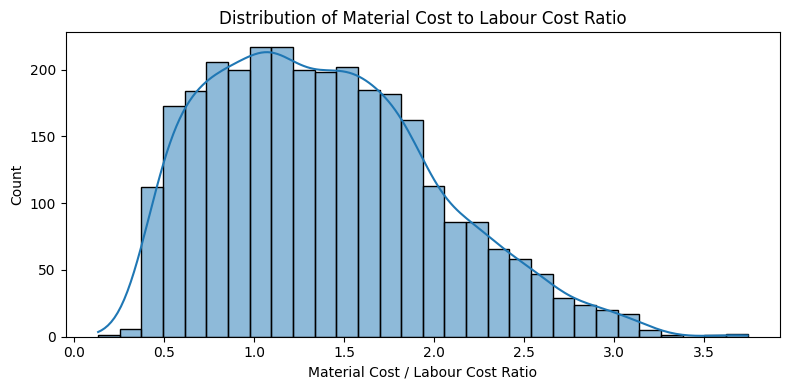

In [20]:
# Visualize the distribution of the ratio
plt.figure(figsize=(8, 4))
sns.histplot(df['Material_to_Labour_Ratio'], kde=True)
plt.title('Distribution of Material Cost to Labour Cost Ratio')
plt.xlabel('Material Cost / Labour Cost Ratio')
plt.tight_layout()
plt.show()

### In summary, this graph shows that in most cases, the Material and Labour Costs are roughly equal, though in some cases, the Material Cost is much higher.

# Q 4

## 4. Efficiency Across Shifts:

#### Do different work shifts (Day, Swing, Night) show differences in how long products take to make or how much energy they use? Compare these shifts to see if one is more efficient or uses less energy.

### Approaches Simplified:

#### Efficiency Across Shifts: Group data by shift and compare the average production time and energy consumption. Use bar charts for visualization and basic statistical tests to check for significant differences.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("D:\Sourav_Singh\Excell ,SQL & Tableau\Project_to_make\y1AQEIpMTR2j7xgr9MH0_Manufacturing Dataset.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Production ID                   3000 non-null   object 
 1   Date                            3000 non-null   object 
 2   Product Type                    3000 non-null   object 
 3   Machine ID                      3000 non-null   int64  
 4   Shift                           3000 non-null   object 
 5   Units Produced                  3000 non-null   int64  
 6   Defects                         2701 non-null   float64
 7   Production Time Hours           3000 non-null   float64
 8   Material Cost Per Unit          3000 non-null   float64
 9   Labour Cost Per Hour            3000 non-null   float64
 10  Energy Consumption kWh          3000 non-null   float64
 11  Operator Count                  3000 non-null   int64  
 12  Maintenance Hours               27

In [23]:
print(df['Shift'].unique())

['Swing' 'Night' 'Day']


In [24]:
df['Shift'].mode()

0    Night
1    Swing
Name: Shift, dtype: object

In [25]:
df['Shift'].value_counts()

Shift
Swing    1009
Night    1009
Day       982
Name: count, dtype: int64

In [26]:
# Group data by shift and calculate mean production time and energy consumption
shift_efficiency = df.groupby('Shift')[['Production Time Hours', 'Energy Consumption kWh']].mean()

print("Average Production Time and Energy Consumption by Shift:")
print(shift_efficiency)

Average Production Time and Energy Consumption by Shift:
       Production Time Hours  Energy Consumption kWh
Shift                                               
Day                12.595652              298.903686
Night              12.524242              302.865897
Swing              12.613677              297.890168


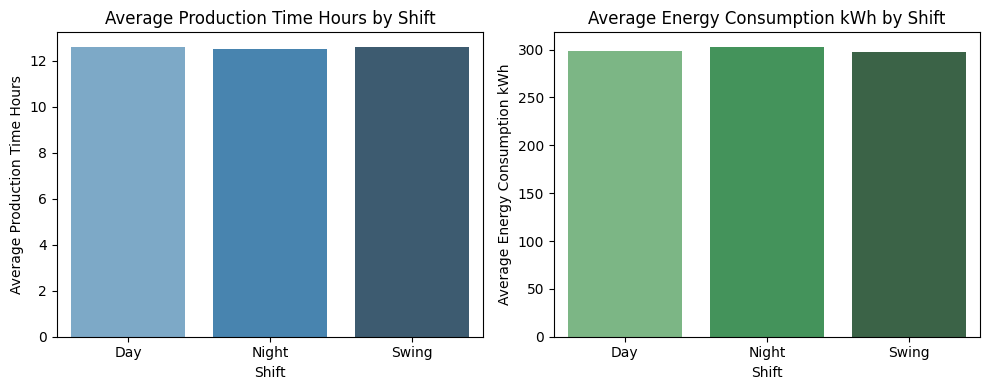

In [27]:
# Step 2: Plotting the average production time for each shift
plt.figure(figsize=(10, 4))

# Production Time Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Shift', y='Production Time Hours', data=shift_efficiency, palette='Blues_d')
plt.title('Average Production Time Hours by Shift')
plt.xlabel('Shift')
plt.ylabel('Average Production Time Hours')

# Energy Consumption Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x='Shift', y='Energy Consumption kWh', data=shift_efficiency, palette='Greens_d')
plt.title('Average Energy Consumption kWh by Shift')
plt.xlabel('Shift')
plt.ylabel('Average Energy Consumption kWh')

plt.tight_layout()
plt.show()

In [28]:
# Step 3: (Optional) Statistical test to check if the differences are significant
import scipy.stats as stats

# Perform ANOVA to check if there's a significant difference in production time between shifts
anova_prod_time = stats.f_oneway(
    df[df['Shift'] == 'Day']['Production Time Hours'], 
    df[df['Shift'] == 'Swing']['Production Time Hours'], 
    df[df['Shift'] == 'Night']['Production Time Hours']
)

# Perform ANOVA to check if there's a significant difference in energy consumption between shifts
anova_energy = stats.f_oneway(
    df[df['Shift'] == 'Day']['Energy Consumption kWh'], 
    df[df['Shift'] == 'Swing']['Energy Consumption kWh'], 
    df[df['Shift'] == 'Night']['Energy Consumption kWh']
)

print(f"ANOVA result for Production Time Hours: p-value = {anova_prod_time.pvalue}")
print(f"ANOVA result for Energy Consumption kWh: p-value = {anova_energy.pvalue}")

ANOVA result for Production Time Hours: p-value = 0.9539455488237562
ANOVA result for Energy Consumption kWh: p-value = 0.5907480278318622


## Conclusion:

#### Based on these p-values, there are no significant differences in either production time (hours) or energy 
#### consumption (kWh) between the different shifts. All shifts perform similarly in terms of how long they take 
#### to make products and how much energy they use.

# Q 5

## 5. Monthly Production Trends:

#### How does the average number of units produced change from month to month? Look for any patterns, such as times of the year when production increases or decreases significantly.

### Approaches Simplified:

#### Monthly Production Trends: Group the data by month and calculate the average units produced for each month. Use line charts to visualize these trends over time.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("D:\Sourav_Singh\Excell ,SQL & Tableau\Project_to_make\y1AQEIpMTR2j7xgr9MH0_Manufacturing Dataset.csv")

In [30]:
# Step 1: Convert the date column to datetime format (if it's not already)
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')  

In [31]:
# Step 2: Extract the month from the date column
df['Month'] = df['Date'].dt.month

In [32]:
# Step 3: Group the data by month and calculate the average units produced
monthly_production = df.groupby('Month')['Units Produced'].mean().reset_index()  # Replace 'Units Produced' with your actual column name

print("Average Units Produced per Month:")
print(monthly_production)

Average Units Produced per Month:
    Month  Units Produced
0       1      124.605735
1       2      124.227451
2       3      125.921053
3       4      122.670833
4       5      127.250000
5       6      125.166667
6       7      127.592742
7       8      122.282258
8       9      128.670833
9      10      120.258065
10     11      125.066667
11     12      126.798387


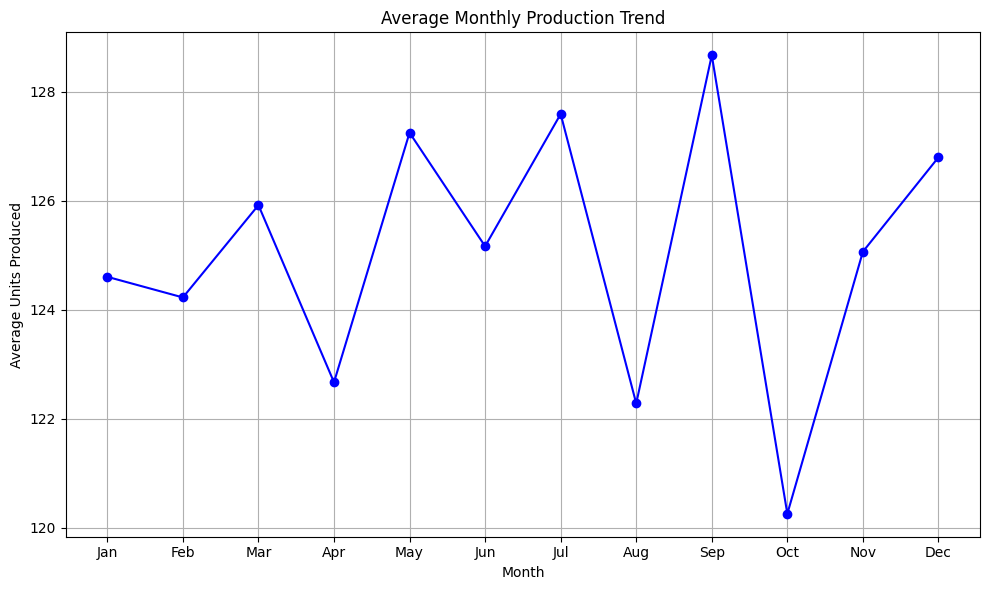

In [33]:
# Step 4: Plot the monthly production trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_production['Month'], monthly_production['Units Produced'], marker='o', linestyle='-', color='b')
plt.title('Average Monthly Production Trend')
plt.xlabel('Month')
plt.ylabel('Average Units Produced')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Q 6

## 6. Variability in Production by Product Type:
#### Which type of product shows the most variation in how much is produced? Measure this using standard deviation to find out which product type's production volume varies the most.
### Approaches Simplified:
#### Variability in Production by Product Type: Calculate the standard deviation of production volume for each product type to identify which has the most variability.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("D:\Sourav_Singh\Excell ,SQL & Tableau\Project_to_make\y1AQEIpMTR2j7xgr9MH0_Manufacturing Dataset.csv")

In [35]:
# Group by Product Type and calculate standard deviation and mean of Units Produced
product_variability = df.groupby('Product Type')['Units Produced'].agg(['std', 'mean']).reset_index()

# Sort by standard deviation in descending order
product_variability = product_variability.sort_values('std', ascending=False)

# Calculate coefficient of variation (CV) for each product type
product_variability['CV'] = product_variability['std'] / product_variability['mean']

In [36]:
# Display the results
print("Variability in Production by Product Type:")
print(product_variability.to_string(index=False))

Variability in Production by Product Type:
Product Type       std       mean       CV
  Appliances 43.935500 123.970732 0.354402
    Textiles 43.811843 126.501656 0.346334
 Electronics 43.716804 121.678883 0.359280
   Furniture 43.502372 123.783069 0.351440
  Automotive 42.699949 128.794072 0.331537


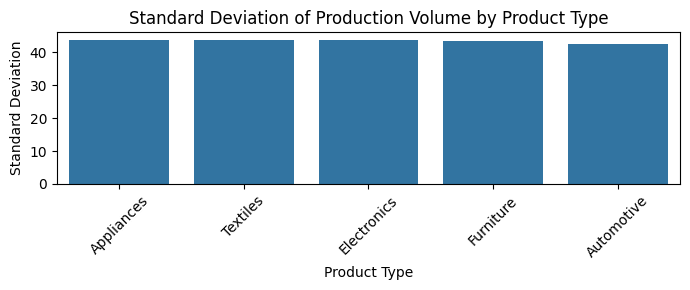

In [37]:
# Create a bar plot of standard deviations
plt.figure(figsize=(7, 3))
sns.barplot(x='Product Type', y='std', data=product_variability)
plt.title('Standard Deviation of Production Volume by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
# Calculate summary statistics for each product type
summary_stats = df.groupby('Product Type')['Units Produced'].describe()
print("\
Summary Statistics for Each Product Type:")
print(summary_stats.to_string())

Summary Statistics for Each Product Type:
              count        mean        std   min   25%    50%    75%    max
Product Type                                                               
Appliances    615.0  123.970732  43.935500  50.0  85.5  124.0  164.0  199.0
Automotive    641.0  128.794072  42.699949  50.0  93.0  132.0  164.0  199.0
Electronics   573.0  121.678883  43.716804  50.0  82.0  121.0  157.0  199.0
Furniture     567.0  123.783069  43.502372  50.0  85.0  122.0  161.5  199.0
Textiles      604.0  126.501656  43.811843  50.0  89.0  128.0  165.0  199.0


In [39]:
# Identify the product type with the highest variability
most_variable_product = product_variability.iloc[0]['Product Type']
highest_std = product_variability.iloc[0]['std']
highest_cv = product_variability.iloc[0]['CV']

print(f"\
The product type with the highest variability is: {most_variable_product}")
print(f"Standard Deviation: {highest_std:.2f}")
print(f"Coefficient of Variation: {highest_cv:.2f}")

The product type with the highest variability is: Appliances
Standard Deviation: 43.94
Coefficient of Variation: 0.35


# Q 7

## 7. The Role of Operator Count in Efficiency:
#### How does the number of operators affect how many units are produced per hour? Check if having more operators leads to more efficient production.
### Approaches Simplified:
#### The Role of Operator Count in Efficiency: Group the data by the number of operators and calculate the average units produced per hour for each group to analyse the impact on efficiency.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("D:\Sourav_Singh\Excell ,SQL & Tableau\Project_to_make\y1AQEIpMTR2j7xgr9MH0_Manufacturing Dataset.csv")

In [41]:
# Step 1: Calculate units produced per hour (if not available directly)
# Assuming you have 'Units Produced' and 'Production Time (Hours)' columns
df['Units per Hour'] = df['Units Produced'] / df['Production Time Hours'] 

In [42]:
# Step 2: Group data by the number of operators and calculate the average units produced per hour
# Replace 'Operator Count' with the actual column name for number of operators in your dataset
operator_efficiency = df.groupby('Operator Count')['Units per Hour'].mean().reset_index()

# Rename columns for clarity
operator_efficiency.columns = ['Operator Count', 'Average Units per Hour']

print("Average Units Produced per Hour by Operator Count:")
print(operator_efficiency)

Average Units Produced per Hour by Operator Count:
   Operator Count  Average Units per Hour
0               1               17.319687
1               2               16.763033
2               3               18.021761
3               4               17.499939


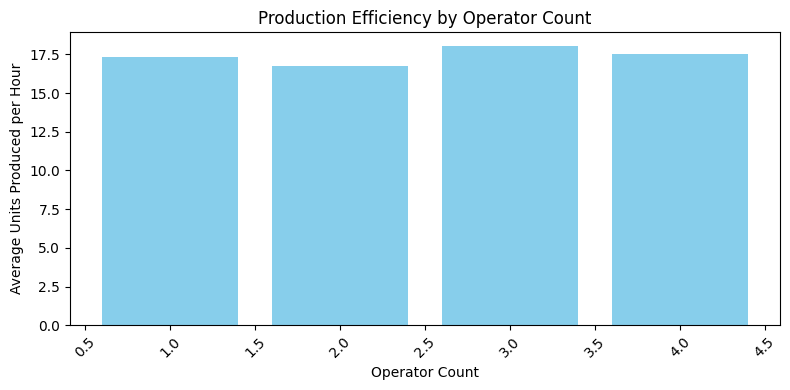

In [43]:
# Step 3: Plotting the efficiency (average units per hour) based on the number of operators
plt.figure(figsize=(8, 4))
plt.bar(operator_efficiency['Operator Count'], operator_efficiency['Average Units per Hour'], color='skyblue')
plt.title('Production Efficiency by Operator Count')
plt.xlabel('Operator Count')
plt.ylabel('Average Units Produced per Hour')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

### Conclusion: 
#### While adding more operators initially increases efficiency, there is a point where the effect of additional operators becomes less impactful (diminishing returns). After this point, adding more operators does not significantly improve production, and may even reduce efficiency due to overcrowding or coordination issues.

### the focus might need to shift to other aspects of the production process, like improving equipment or workflow design, rather than increasing the number of operators.

# Q 8

## 8.Identifying the Machine with Most Defects: 

#### Which machine tends to produce the most defects, considering the total units it produces? Calculate the defect rate as defects per 100 units to make comparisons easier.

### Approaches Simplified::

#### Identifying the Machine with Most Defects: Calculate the defect rate for each machine (defects per 100 units produced) and identify the machine with the highest rate.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("D:\Sourav_Singh\Excell ,SQL & Tableau\Project_to_make\y1AQEIpMTR2j7xgr9MH0_Manufacturing Dataset.csv")

In [45]:
# Ensure the dataset contains relevant columns: 'Machine', 'Total Units Produced', and 'Defective Units'
# Create a new column for Defect Rate
df['Defect Rate (per 100 units)'] = (df['Defects'] / df['Units Produced']) * 100

# Sort the dataframe by 'Defect Rate' in descending order to find the machine with the highest defect rate
sorted_df = df.sort_values(by='Defect Rate (per 100 units)', ascending=False)

In [46]:
sorted_df.head()

Production ID        Date Product Type  Machine ID  Shift  \
1511    20-02-1904  20-02-2024  Electronics          16  Night   
116     26-04-1900  26-04-2020   Automotive           4  Night   
1028    25-10-1902  25-10-2022    Furniture          20    Day   
1625    13-06-1904  13-06-2024   Automotive           1    Day   
697     28-11-1901  28-11-2021   Appliances          11  Night   

      Units Produced  Defects  Production Time Hours  Material Cost Per Unit  \
1511              51     34.0                  18.11                   21.92   
116               51     20.0                  13.39                   42.25   
1028              77     21.0                  23.72                   25.74   
1625              90     24.0                  11.24                   43.39   
697               94     24.0                  12.77                   49.45   

      Labour Cost Per Hour  ...  Operator Count  Maintenance Hours  \
1511                 23.65  ...               1               0.78   
116                  22.38  ...               1                NaN   
1028                 26.77  ...               4               2.38   
1625                 24.95  ...               2               2.76   
697                  25.12  ...               1               4.99   

      Down time Hours  Production Volume Cubic Meters  Scrap Rate  \
1511             0.32                            1.61       0.036   
116              0.62                            1.62       0.031   
1028             1.78                            1.84       0.040   
1625             0.99                            1.34       0.011   
697              2.46                            0.95       0.029   

      Rework Hours  Quality Checks Failed  Average Temperature C  \
1511          0.34                      0                   22.4   
116           0.41                      0                   22.2   
1028          1.44                      1                   22.6   
1625          0.83                      0                   21.6   
697            NaN                      0                   21.9   

      Average Humidity Percent  Defect Rate (per 100 units)  
1511                      33.1                    66.666667  
116                       58.9                    39.215686  
1028                      46.3                    27.272727  
1625                      45.0                    26.666667  
697                       48.2                    25.531915  

[5 rows x 21 columns]

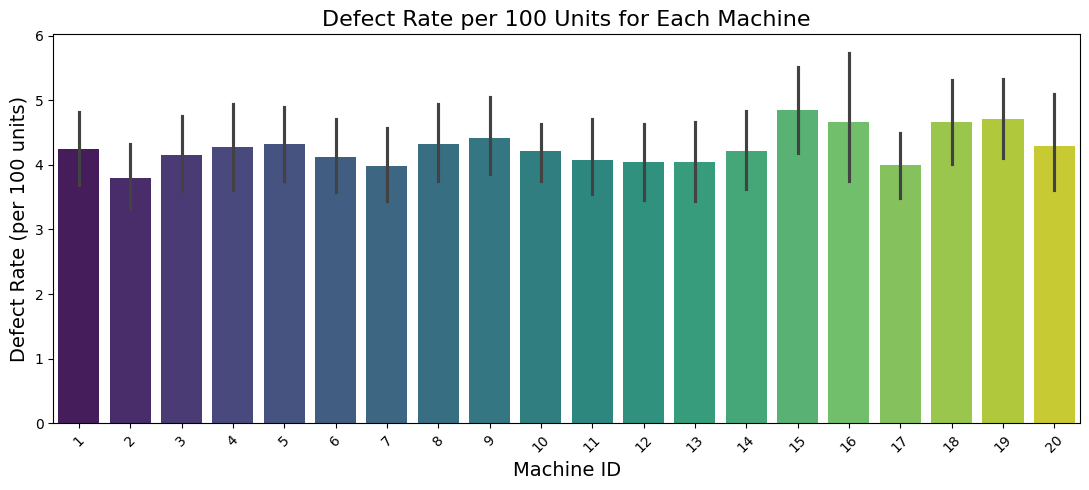

In [47]:
# Set the size of the plot
plt.figure(figsize=(11, 5))

# Create a bar plot
sns.barplot(x='Machine ID', y='Defect Rate (per 100 units)', data=sorted_df, palette='viridis')

# Adding title and labels
plt.title('Defect Rate per 100 Units for Each Machine', fontsize=16)
plt.xlabel('Machine ID', fontsize=14)
plt.ylabel('Defect Rate (per 100 units)', fontsize=14)

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

In [48]:
# Display the machine with the highest defect rate
machine_with_most_defects = sorted_df.iloc[0]

print("Machine with the most defects is:")
print(machine_with_most_defects[['Machine ID', 'Defect Rate (per 100 units)']])

Machine with the most defects is:
Machine ID                            16
Defect Rate (per 100 units)    66.666667
Name: 1511, dtype: object


# Q 9

## 9.How Environment Affects Scrap Rate: 

#### Do changes in temperature and humidity affect how much scrap (waste) is produced? Analyze the data to see if there's a correlation between environmental conditions and scrap rate.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("D:\Sourav_Singh\Excell ,SQL & Tableau\Project_to_make\y1AQEIpMTR2j7xgr9MH0_Manufacturing Dataset.csv")

In [50]:
# Calculate Scrap Rate
df['Scrap Rate (per 100 units)'] = (df['Scrap Rate'] / df['Units Produced']) * 100

# Check for correlation between environmental factors and Scrap Rate
correlation_temp = df['Average Temperature C'].corr(df['Scrap Rate (per 100 units)'])
correlation_humidity = df['Average Humidity Percent'].corr(df['Scrap Rate (per 100 units)'])

print(f"Correlation between Temperature C and Scrap Rate: {correlation_temp}")
print(f"Correlation between Average Humidity Percent and Scrap Rate: {correlation_humidity}")

Correlation between Temperature C and Scrap Rate: 0.01834952912390226
Correlation between Average Humidity Percent and Scrap Rate: 0.00778904612173355


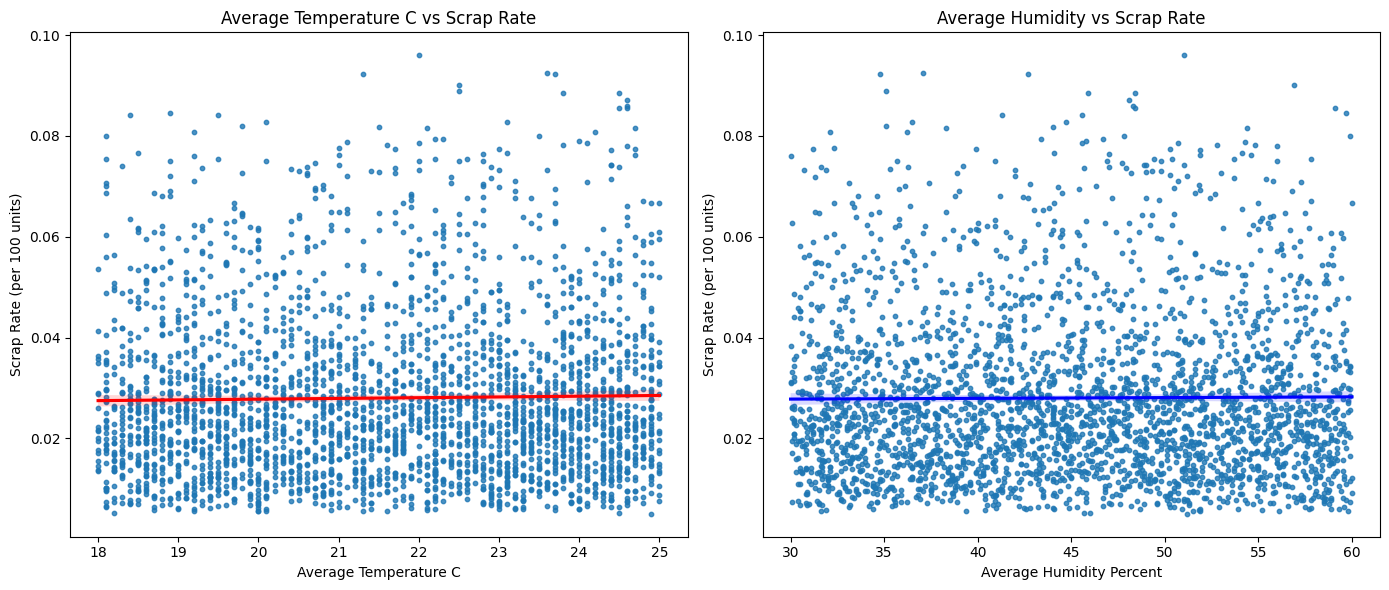

In [51]:
# Plotting the relationships using scatter plots with regression lines
plt.figure(figsize=(14, 6))

# Temperature vs Scrap Rate
plt.subplot(1, 2, 1)
sns.regplot(x='Average Temperature C', y='Scrap Rate (per 100 units)', data=df, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('Average Temperature C vs Scrap Rate')
plt.xlabel('Average Temperature C')
plt.ylabel('Scrap Rate (per 100 units)')

# Humidity vs Scrap Rate
plt.subplot(1, 2, 2)
sns.regplot(x='Average Humidity Percent', y='Scrap Rate (per 100 units)', data=df, scatter_kws={'s':10}, line_kws={"color":"blue"})
plt.title('Average Humidity vs Scrap Rate')
plt.xlabel('Average Humidity Percent')
plt.ylabel('Scrap Rate (per 100 units)')

plt.tight_layout()
plt.show()

### Conclusion:
#### Both temperature and humidity show negligible correlations with scrap rate, confirming that environmental conditions (in terms of temperature and humidity) are not significant factors influencing scrap production. Other variables should be examined to understand the drivers of scrap rate.